In [9]:
import pandas as aju
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_digits

In [19]:
digit = load_digits()
df = aju.DataFrame(digit.data)
df['target'] = digit.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


<Figure size 640x480 with 0 Axes>

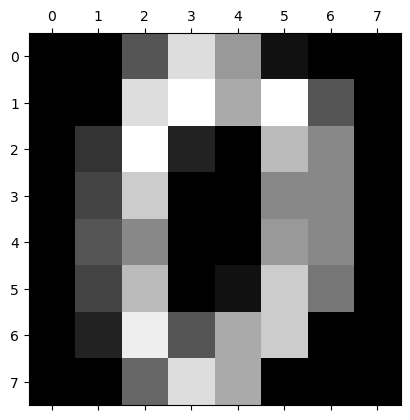

In [25]:
plt.gray()
plt.matshow(digit.images[0])

In [29]:
digit.target_names[0]

0

In [23]:
x = df.drop('target',axis = 'columns')
y = df.target

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 99)

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

<Axes: >

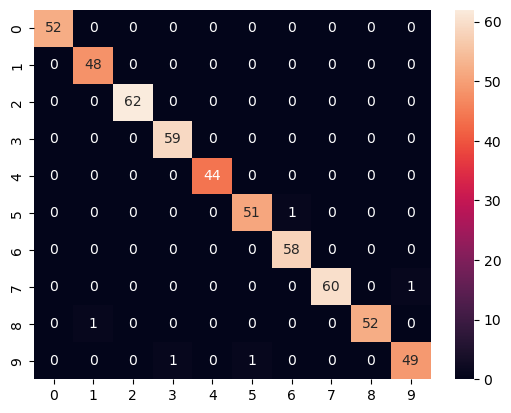

In [61]:
cmap = confusion_matrix(y_test,y_pred)
sns.heatmap(cmap,annot=True)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        62
           3       0.98      1.00      0.99        59
           4       1.00      1.00      1.00        44
           5       0.98      0.98      0.98        52
           6       0.98      1.00      0.99        58
           7       1.00      0.98      0.99        61
           8       1.00      0.98      0.99        53
           9       0.98      0.96      0.97        51

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [37]:
gsc = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[1,3,5,10,15]},return_train_score = False,cv = 5)

In [39]:
gsc.fit(digit.data,digit.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 15]})

In [43]:
gsc.best_score_

0.966621788919839

In [45]:
gsc.best_params_

{'n_neighbors': 3}

In [53]:
dt = aju.DataFrame(gsc.cv_results_)
dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000801,4.003331e-04,0.149400,0.147549,1,{'n_neighbors': 1},0.961111,0.952778,0.966574,0.986072,0.955432,0.964393,0.011838,2
1,0.000606,4.945018e-04,0.071794,0.008209,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,1
2,0.001203,7.514563e-04,0.072003,0.004050,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,3
3,0.001000,6.328634e-04,0.077203,0.007281,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,4
4,0.001000,3.234067e-07,0.083800,0.007218,15,{'n_neighbors': 15},0.933333,0.950000,0.969359,0.972145,0.947075,0.954383,0.014529,5
